In [1]:
#import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random

In [2]:
# Load train and test data of mnist
# mnist=tf.keras.datasets.mnist
# (xtrain,ytrain),(xtest,ytest)=mnist.load_data()
import pandas as pd
train_data=pd.read_csv('LP-IV-datasets/MNIST(Ass2&3)/mnist_train.csv')
xtrain=train_data.drop('label',axis=1).values
ytrain=train_data['label'].values

test_data=pd.read_csv('LP-IV-datasets/MNIST(Ass2&3)/mnist_test.csv')
xtest=test_data.drop('label',axis=1).values
ytest=test_data['label'].values

xtrain=xtrain.reshape(-1,28,28)
xtest=xtest.reshape(-1,28,28)

print("Xtrain shape :",xtrain.shape)
print("Xtest shape :",xtest.shape)
print("ytrain shape :",ytrain.shape)
print("ytest shape :",ytest.shape)

Xtrain shape : (60000, 28, 28)
Xtest shape : (10000, 28, 28)
ytrain shape : (60000,)
ytest shape : (10000,)


In [3]:
# preprocessing - Normalizing the data from 255 scale pixel to have value between 0 to 1
xtrain=xtrain/255.0
xtest=xtest/255.0

In [4]:
# Define the network architecture using Keras
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
# Train the model using SGD with 11 epochs
model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=['accuracy'])
history=model.fit(xtrain,ytrain,epochs=11,validation_data=(xtest,ytest))


Epoch 1/11
1875/1875 [==============================] - 18s 9ms/step - loss: 0.6549 - accuracy: 0.8367 - val_loss: 0.3532 - val_accuracy: 0.9060
Epoch 2/11
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3362 - accuracy: 0.9064 - val_loss: 0.2897 - val_accuracy: 0.9192
Epoch 3/11
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2875 - accuracy: 0.9190 - val_loss: 0.2573 - val_accuracy: 0.9272
Epoch 4/11
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2578 - accuracy: 0.9276 - val_loss: 0.2345 - val_accuracy: 0.9328
Epoch 5/11
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2356 - accuracy: 0.9337 - val_loss: 0.2184 - val_accuracy: 0.9386
Epoch 6/11
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2174 - accuracy: 0.9387 - val_loss: 0.2036 - val_accuracy: 0.9404
Epoch 7/11
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2021 - accuracy: 0.9443 - val_loss: 0.1914 - val_ac

In [6]:
# Evaluate the model
model_loss,model_acc=model.evaluate(xtest,ytest)
print(f"Model Loss: {model_loss*100}")
print(f"Model Acc :{model_acc*100}")

313/313 [==============================] - 1s 4ms/step - loss: 0.1549 - accuracy: 0.9534
Model Loss: 15.485486388206482
Model Acc :95.34000158309937


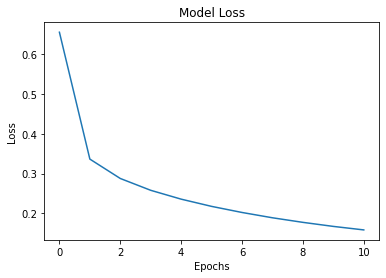

In [7]:
# Plot the training loss and acc
# loss
plt.plot(history.history['loss'])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

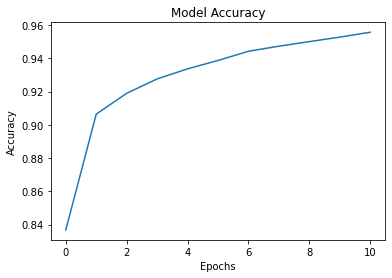

In [8]:
# Acc
plt.plot(history.history['accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

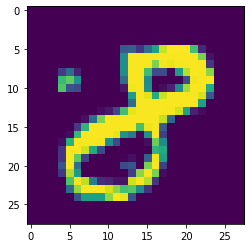

In [9]:
# Demo
n=random.randint(0,9999)
plt.imshow(xtest[n])
plt.show()

In [10]:
pred=model.predict(xtest)
print("Target value :",ytest[n])
print("Predicted Value :",np.argmax(pred[n]))

313/313 [==============================] - 1s 3ms/step
Target value : 8
Predicted Value : 8
